In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Generate a sample 1D signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 10, 10 * fs)  # Time vector
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)  # Example signal

# Calculate the spectrogram using scipy's spectrogram function
frequencies, times, spectrogram_data = spectrogram(signal, fs)

# Plot the spectrogram
plt.figure(figsize=(8, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data))  # Use log scale for better visualization
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram of 1D Signal')
plt.colorbar(label='Intensity [dB]')

# Convert the plot to a numpy array
fig = plt.gcf()
fig.canvas.draw()
image_np = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_np = image_np.reshape(fig.canvas.get_width_height()[::-1] + (3,))

plt.close()  # Close the plot to prevent displaying it

# Now you have the spectrogram as a numpy array
print("Shape of numpy array:", image_np.shape)


Shape of numpy array: (600, 800, 3)


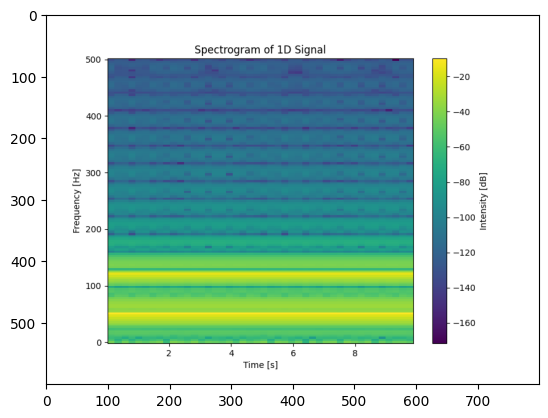

In [2]:
plt.imshow(image_np)

In [3]:
import numpy as np
from scipy.signal import spectrogram

# Generate a sample 1D signal
fs = 200  # Sampling frequency
t = np.linspace(0, 10, 10 * fs)  # Time vector
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)  # Example signal

# Calculate the spectrogram using scipy's spectrogram function
frequencies, times, spectrogram_data = spectrogram(signal, fs)

# Normalize the spectrogram data
spectrogram_data /= np.max(spectrogram_data)

# Resize the spectrogram to (128, 512)
spectrogram_resized = np.zeros((128, 512))
spectrogram_resized[:, :min(512, spectrogram_data.shape[1])] = spectrogram_data[:128, :512]

# Convert to numpy image (0-255 range)
image_np = (255 * spectrogram_resized).astype(np.uint8)

# Print the shape of the numpy array
print("Shape of numpy array:", image_np.shape)


Shape of numpy array: (128, 512)


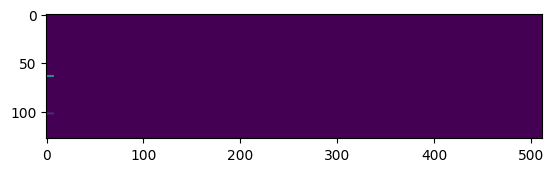

In [4]:
plt.imshow(image_np)

In [5]:
pywt.families()

NameError: name 'pywt' is not defined

In [7]:
import numpy as np
import cv2
import pywt

def spectrogram_cwt(signal, wavelet='morl', scales=np.arange(1, 128)):
    coeffs, freqs = pywt.cwt(signal, scales, wavelet)
    power = (np.abs(coeffs)) ** 2
    return power, freqs


fs = 1000
t = np.arange(0, 10, 1/fs)
signal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

scales = np.arange(1, 128)


power, freqs = spectrogram_cwt(signal, scales=scales)


power_normalized = ((power - power.min()) / (power.max() - power.min()) * 255).astype(np.uint8)


# spectrogram_image = cv2.applyColorMap(power_normalized, cv2.COLORMAP_JET)


spectrogram_image_resized = cv2.resize(power_normalized, (128, 128))

# Display the spectrogram
cv2.imshow('Continuous Wavelet Transform Spectrogram', spectrogram_image_resized)
cv2.waitKey(0)



113

In [4]:
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2
from scipy.signal import stft


def spectrogram_stft(signal, fs=1000, nperseg=256):
    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg)
    power = np.abs(Zxx)**2
    return power, f, t


fs = 200
t = np.arange(0, 10, 1/fs)

power_stft, f_stft, t_stft = spectrogram_stft(signal, fs=fs)


power_normalized_stft = ((power_stft - power_stft.min()) / (power_stft.max() - power_stft.min()) * 255).astype(np.uint8)


spectrogram_image_resized_stft = cv2.resize(power_normalized_stft, (128, 128))


cv2.imshow('Short-Time Fourier Transform Spectrogram', spectrogram_image_resized_stft)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import numpy as np
import cv2

def superlet_transform(signal, order=4, length=128):
    """
    Computes the superlet transform of a given signal.

    Args:
    signal (array_like): The input 1D signal.
    order (int): The order of the superlet transform.
    length (int): The length of the superlet.

    Returns:
    array_like: The superlet coefficients.
    """
    # Initialize the superlet coefficients
    superlet_coeffs = np.zeros((order, len(signal)), dtype=np.complex128)

    # Generate superlet basis functions
    for k in range(order):
        t = np.linspace(-length/2, length/2, length)
        psi_k = np.exp(-t**2 / (2 * (length / (2*np.pi*(k+1)))**2)) * np.exp(1j * 2 * np.pi * (k+1) * t)
        
        # Normalize the superlet
        psi_k /= np.linalg.norm(psi_k)
        
        # Convolve the signal with the superlet
        superlet_coeffs[k, :] = np.convolve(signal, np.flip(psi_k), mode='same')

    return superlet_coeffs

# Example usage:
# Generate a sample signal (you can replace this with your own signal)
fs = 1000  # Sample rate
t = np.arange(0, 10, 1/fs)  # 10 seconds signal
signal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

# Compute superlet transform
order = 4  # Order of the superlet transform
length = 128  # Length of the superlet
superlet_coeffs = superlet_transform(signal, order=order, length=length)

# Plot the real and imaginary parts of the superlet coefficients
for k in range(order):
    # Normalize the real and imaginary parts for visualization
    real_part = np.real(superlet_coeffs[k, :])
    imag_part = np.imag(superlet_coeffs[k, :])
    real_part = ((real_part - real_part.min()) / (real_part.max() - real_part.min()) * 255).astype(np.uint8)
    imag_part = ((imag_part - imag_part.min()) / (imag_part.max() - imag_part.min()) * 255).astype(np.uint8)

    # Convert to grayscale images
    real_image = cv2.applyColorMap(real_part, cv2.COLORMAP_JET)
    imag_image = cv2.applyColorMap(imag_part, cv2.COLORMAP_JET)

    # Display the real and imaginary parts of the superlet coefficients
    cv2.imshow(f'Superlet Coefficients (Order={k+1}, Real)', real_image)
    cv2.imshow(f'Superlet Coefficients (Order={k+1}, Imaginary)', imag_image)
    cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()


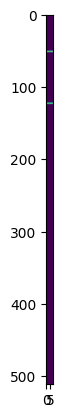

: 

In [6]:
import matplotlib.pyplot as plt
import jax.numpy as jnp

def stft(a, n_fft=128, window=jnp.hanning):  
  n = n_fft
  rpad = n - a.shape[-1] % n
  wins = jnp.pad(a, (0, rpad)).reshape(-1, n) * window(n)
  fftc = jnp.fft.fftshift(jnp.fft.fft(wins, n=n))[..., n // 2 : n]
  fftr = jnp.real(fftc * jnp.conj(fftc))
  return fftr

audio = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
_ = plt.imshow(stft(audio, 1024).T[:, -512:], cmap="viridis")

: 

In [ ]:
import numpy as np

: 

In [13]:
superlets(data=signal,fs = 200,foi = np.arange(0,20),c1=5,ord =3)

TypeError: object of type 'int' has no len()